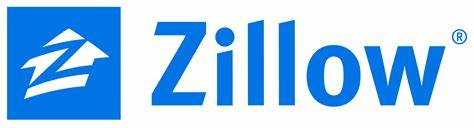

In [1]:
from IPython.display import Image
Image("data/th.jpeg")

# Zillow Dataset

I'm using Zillow's price per square foot data collected on about twelve thousand cities in the US to create a picture of rent prices in handy visuals. Key questions for this notebook are: How have prices changed in major cities over the past decade? Do prices change more in different sized cities? What is the relationship between population of a city and price? What is the relationship between state and price?

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
zillow = pd.read_csv('data/pricepersqft.csv')
for column in zillow.columns:
    if zillow.columns.get_loc(column) >= 6:
        month_year = column[0:3] + column[-5:]
        zillow = zillow.rename({column: month_year}, axis=1)

zillow.set_index(zillow['City'], inplace=True)
zillow.head()

,City Code,City,Metro,County,State,Population Rank,Nov 2010,Dec 2010,Jan 2011,Feb 2011,...,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017
City,,,,,,,,,,,,,,,,,,,,,
New York,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
Los Angeles,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.580,1.582,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
Chicago,17426,Chicago,Chicago,Cook,IL,3,1.244,1.248,1.254,1.254,...,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374
Houston,39051,Houston,Houston,Harris,TX,4,0.788,0.784,0.784,0.786,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,0.974
Philadelphia,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.858,0.858,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974


The top five US cities by population only make up 6% of the total US population, but they are well distributed and are more representative than the bottom five.

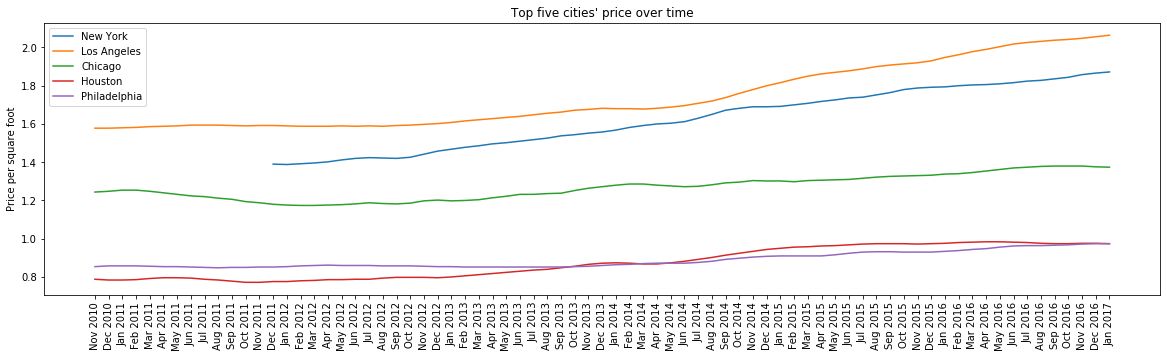

In [3]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)
plt.plot(zillow.iloc[0, 6:], label = zillow['City'][0])
plt.plot(zillow.iloc[1, 6:], label = zillow['City'][1])
plt.plot(zillow.iloc[2, 6:], label = zillow['City'][2])
plt.plot(zillow.iloc[3, 6:], label = zillow['City'][3])
plt.plot(zillow.iloc[4, 6:], label = zillow['City'][4])
plt.xticks(rotation=90)
plt.title("Top five cities' price over time")
plt.ylabel('Price per square foot')
plt.legend()
plt.show()

Next we'll look at the 30 most expensive and least expensive cities to get an idea of the location, population, and change in price as a percent of the starting price of the two extremes.

In [5]:
first_num = []
for city in zillow.itertuples():
    for month in city:
        if type(month) == float and pd.isnull(month) == False:
            first_num.append(month)
            break
            
zillow['first_num'] = first_num
change_pct = (zillow['Jan 2017'] - first_num) / first_num
zillow['change_pct'] = change_pct

In [6]:
zillow.sort_values(['Jan 2017'], ascending=False)

,City Code,City,Metro,County,State,Population Rank,Nov 2010,Dec 2010,Jan 2011,Feb 2011,...,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017,first_num,change_pct
City,,,,,,,,,,,,,,,,,,,,,
Fisher Island,4721,Fisher Island,Miami-Fort Lauderdale,Miami-Dade,FL,11628,4.482,4.508,4.558,4.564,...,6.404,6.452,6.476,6.486,6.476,6.470,6.440,6.406,4.482,0.429273
Stinson Beach,49856,Stinson Beach,San Francisco,Marin,CA,11892,4.392,4.378,4.184,3.886,...,5.084,5.134,5.178,5.204,5.204,5.170,5.146,5.176,4.392,0.178506
Atherton,30280,Atherton,San Francisco,San Mateo,CA,5033,3.146,3.248,3.110,3.054,...,4.828,4.800,4.752,4.706,4.676,4.668,4.650,4.658,3.146,0.480610
Jupiter Island,124901,Jupiter Island,Port St. Lucie,Martin,FL,11159,4.006,4.018,4.056,4.076,...,4.882,4.848,4.810,4.798,4.794,4.750,4.656,4.554,4.006,0.136795
Belvedere,10348,Belvedere,San Francisco,Marin,CA,8898,4.460,4.442,4.220,3.874,...,4.752,4.742,4.714,4.660,4.592,4.494,4.418,4.396,4.460,-0.014350
Malibu,12520,Malibu,Los Angeles,Los Angeles,CA,3284,3.516,3.512,3.512,3.506,...,4.274,4.328,4.328,4.300,4.272,4.272,4.304,4.348,3.516,0.236633
Laguna Beach,52842,Laguna Beach,Los Angeles,Orange,CA,2287,3.360,3.330,3.320,3.304,...,4.098,4.140,4.180,4.224,4.272,4.294,4.310,4.314,3.360,0.283929
Boca Grande,3734,Boca Grande,Fort Myers,Lee,FL,11188,2.584,2.586,2.580,2.558,...,3.916,3.990,4.040,4.090,4.170,4.252,4.300,4.270,2.584,0.652477
Del Mar,8185,Del Mar,San Diego,San Diego,CA,7166,3.588,3.588,3.586,3.586,...,4.400,4.418,4.416,4.388,4.356,4.336,4.310,4.268,3.588,0.189521


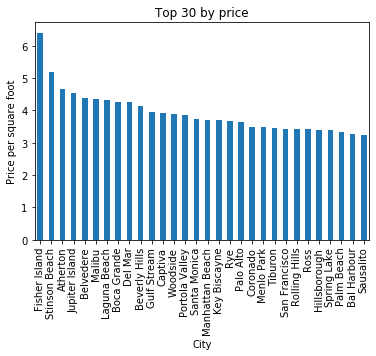

In [7]:
priciest_2017 = (zillow.sort_values(['Jan 2017'], ascending=False))
priciest_2017['Jan 2017'].head(30).plot(kind='bar')
plt.ylabel('Price per square foot')
plt.title('Top 30 by price')
plt.show()

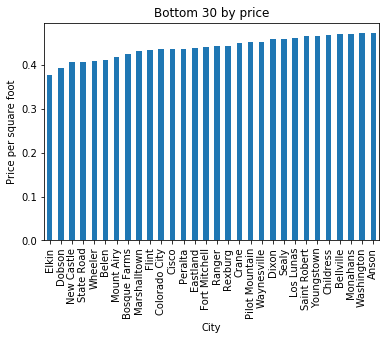

In [8]:
## I would like to change this to also show the states of each city
cheapest_2017 = (zillow.sort_values(['Jan 2017']))
cheapest_2017['Jan 2017'].head(30).plot(kind='bar')
plt.ylabel('Price per square foot')
plt.title('Bottom 30 by price')
plt.show()

Interestingly, both sets of cities are all small, with the notable exceptions of Santa Monica, Flint, and San Francisco. They also appear to be grouped by region, with the most expensive citie tending to be in California or Florida, and the least expensive tending to be in Texas, New Mexico, or North Carolina. The change in price is also more consistently positive and generally higher in the priciest cities.

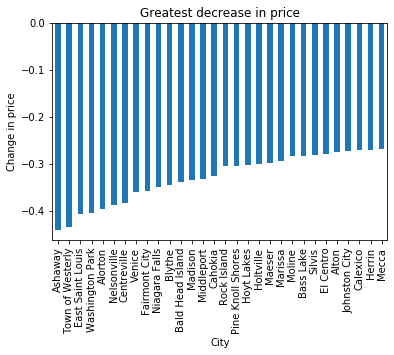

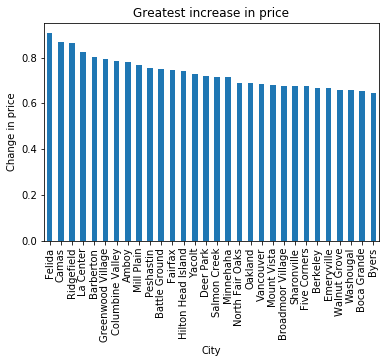

In [20]:
sort_change = (zillow.sort_values(['change_pct']))
sort_change['change_pct'].head(30).plot(kind='bar')
plt.title('Greatest decrease in price')
plt.ylabel('Change in price')
plt.show()

sort_change_top = (zillow.sort_values(['change_pct'], ascending=False))
sort_change_top['change_pct'].head(30).plot(kind='bar')
plt.title('Greatest increase in price')
plt.ylabel('Change in price')
plt.show()

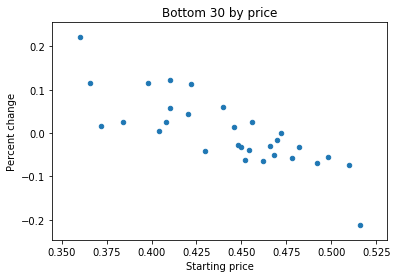

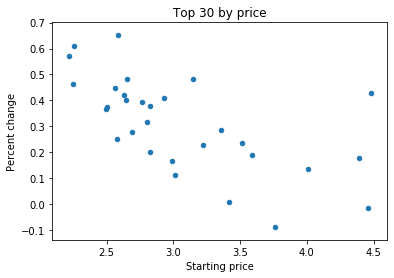

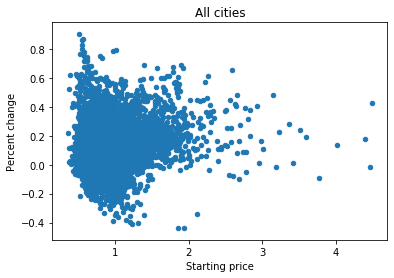

In [10]:
cheapest_2017 = (zillow.sort_values(['Jan 2017']))
cheapest_2017.head(30).plot.scatter('first_num', 'change_pct')
plt.title('Bottom 30 by price')
plt.ylabel('Percent change')
plt.xlabel('Starting price')
plt.show()

priciest_2017 = (zillow.sort_values(['Jan 2017'], ascending=False))
priciest_2017.head(30).plot.scatter('first_num', 'change_pct')
plt.title('Top 30 by price')
plt.ylabel('Percent change')
plt.xlabel('Starting price')
plt.show()

zillow.plot.scatter('first_num', 'change_pct')
plt.title('All cities')
plt.ylabel('Percent change')
plt.xlabel('Starting price')
plt.show()

You actually can see a slight downward trend below - as cities get smaller, so do prices

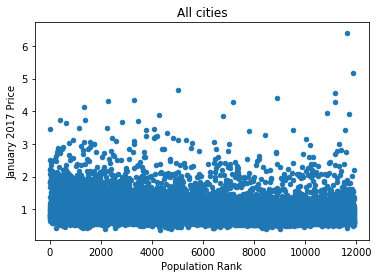

In [11]:
zillow.plot.scatter('Population Rank', 'Jan 2017')
plt.title('All cities')
plt.ylabel('January 2017 Price')
plt.xlabel('Population Rank')
plt.show()

An organization of states by mean price per square foot in January 2017, least to most.

In [12]:
states = zillow[6:-2].groupby(['State']).mean()
states.sort_values(['Jan 2017'])

,City Code,Population Rank,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,Jun 2011,...,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017,first_num,change_pct
State,,,,,,,,,,,,,,,,,,,,,
AR,32907.000000,7379.223776,0.563839,0.569066,0.570438,0.570642,0.569314,0.570000,0.571796,0.572409,...,0.640755,0.639580,0.637119,0.635329,0.634923,0.635469,0.635497,0.635664,0.572224,0.112199
OK,33165.275449,7043.119760,0.596420,0.601556,0.604691,0.605111,0.603914,0.601235,0.597815,0.594086,...,0.675150,0.671856,0.667461,0.663653,0.661509,0.659988,0.657042,0.653449,0.597437,0.093420
AL,35189.914692,6612.805687,0.612363,0.612857,0.613121,0.614879,0.615945,0.616659,0.616791,0.617934,...,0.668341,0.667194,0.664607,0.662408,0.660986,0.660332,0.660303,0.660749,0.613659,0.073046
MS,33486.827160,5167.395062,0.633733,0.634667,0.634533,0.632773,0.630213,0.627733,0.626453,0.627173,...,0.691432,0.690568,0.686469,0.682099,0.678790,0.678074,0.678914,0.680519,0.629284,0.078621
WV,37502.869048,6481.250000,0.674174,0.685072,0.697362,0.705130,0.705043,0.696377,0.685739,0.679391,...,0.715690,0.710548,0.701095,0.691333,0.685524,0.684929,0.686000,0.688500,0.683071,0.008374
NM,41842.250000,5144.150000,0.687474,0.687895,0.689579,0.690105,0.688526,0.686316,0.689579,0.700000,...,0.706200,0.702650,0.699350,0.696450,0.694350,0.692800,0.692100,0.691850,0.682600,0.009779
IN,36760.484756,6920.106707,0.670575,0.673381,0.676056,0.676563,0.675181,0.672275,0.670081,0.669969,...,0.708780,0.708933,0.708372,0.706854,0.705945,0.706091,0.705927,0.705671,0.670043,0.051982
GA,38043.455307,6202.905028,0.675488,0.676488,0.676942,0.676378,0.674052,0.672581,0.671000,0.669959,...,0.714453,0.714888,0.714285,0.714324,0.715693,0.717883,0.719570,0.720877,0.672173,0.065175
ID,29735.546875,6471.171875,NaN,NaN,NaN,NaN,0.628691,0.630109,0.629745,0.627200,...,0.711125,0.712969,0.716031,0.719969,0.724938,0.729281,0.732375,0.733500,0.621375,0.191122


A few states have extreme outliers that change their position if we use mean price. To get a more realistic picture, we'll use median price instead.

In [13]:
states = zillow[6:-2].groupby(['State']).median()
states.sort_values(['Jan 2017'])

,City Code,Population Rank,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,Jun 2011,...,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017,first_num,change_pct
State,,,,,,,,,,,,,,,,,,,,,
AR,28718.0,8202.0,0.554,0.562,0.564,0.564,0.562,0.562,0.562,0.562,...,0.634,0.628,0.626,0.624,0.624,0.626,0.624,0.622,0.558,0.097122
AL,31276.0,6530.0,0.598,0.600,0.602,0.601,0.602,0.602,0.604,0.605,...,0.644,0.638,0.634,0.634,0.634,0.634,0.636,0.634,0.600,0.073801
OK,31289.0,7492.0,0.590,0.594,0.596,0.596,0.592,0.587,0.583,0.585,...,0.660,0.662,0.654,0.650,0.648,0.648,0.644,0.642,0.592,0.103560
MS,32179.0,4518.0,0.632,0.632,0.630,0.632,0.622,0.612,0.606,0.608,...,0.666,0.666,0.664,0.662,0.660,0.660,0.660,0.660,0.630,0.072131
WV,30788.5,6647.5,0.672,0.684,0.694,0.700,0.702,0.700,0.688,0.678,...,0.705,0.702,0.695,0.682,0.668,0.666,0.665,0.669,0.675,0.016011
GA,29861.5,6426.0,0.656,0.656,0.656,0.656,0.656,0.652,0.651,0.651,...,0.677,0.676,0.674,0.674,0.674,0.676,0.678,0.680,0.654,0.050222
IN,31513.0,7737.0,0.662,0.664,0.665,0.665,0.665,0.661,0.660,0.660,...,0.698,0.699,0.699,0.696,0.696,0.697,0.698,0.698,0.662,0.042720
NM,36884.5,3972.0,0.668,0.668,0.670,0.674,0.680,0.672,0.674,0.688,...,0.706,0.706,0.706,0.705,0.704,0.701,0.699,0.701,0.673,-0.008922
ID,30789.5,7033.0,NaN,NaN,NaN,NaN,0.584,0.584,0.586,0.590,...,0.690,0.690,0.693,0.696,0.699,0.702,0.702,0.701,0.582,0.195536


There is a general slight uptrend in prices for all states, notable exceptions being Wyoming and Michigan. Unfortunately two outliers, DC and Hawaii, squish the other states into a jumble. California is indeed a pricier state, but Florida is only pricier on average due to a high number of small and expensive cities. On the other side, Texas's inexpensive cities are not reprentative of the state overall, and North Carolina and New Mexico are beaten by the South.

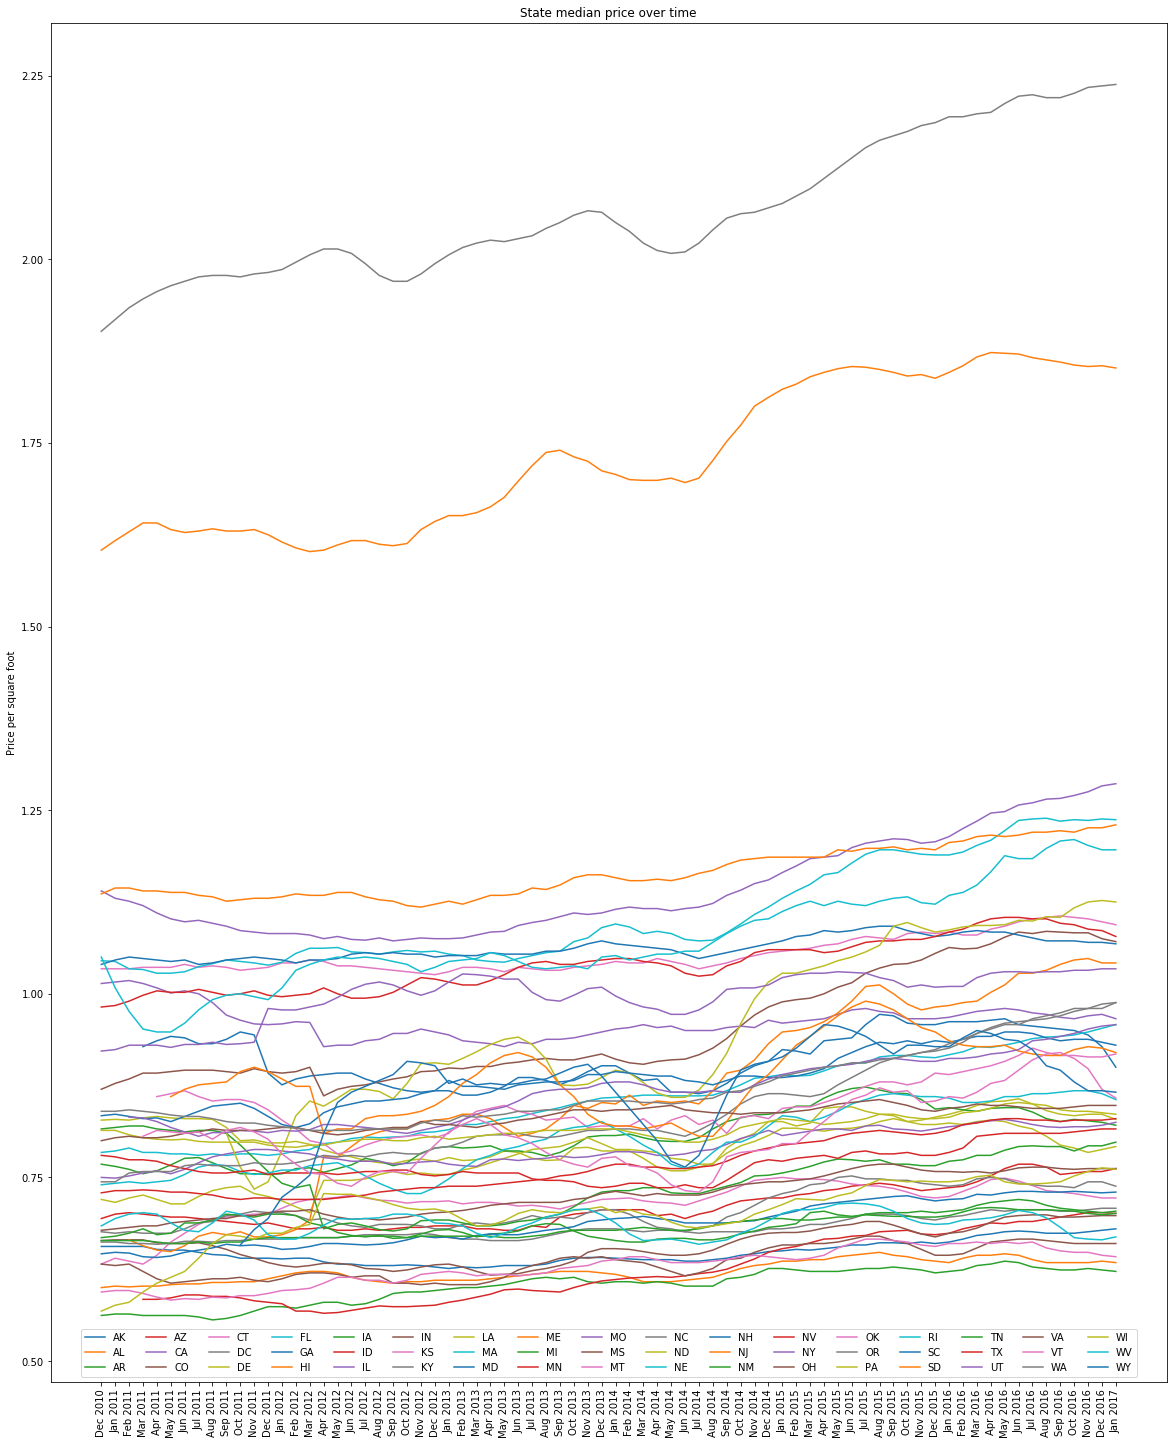

In [14]:
fig = plt.figure()
fig.set_figheight(25)
fig.set_figwidth(20)
plt.xticks(rotation=90)
plt.title("State median price over time")
plt.ylabel('Price per square foot')
for i in range(len(states)):
    plt.plot(states.iloc[i, 3:-2])
plt.legend(states.index, loc = 'lower center', ncol=17)
    
plt.show()

The same graph without outliers:

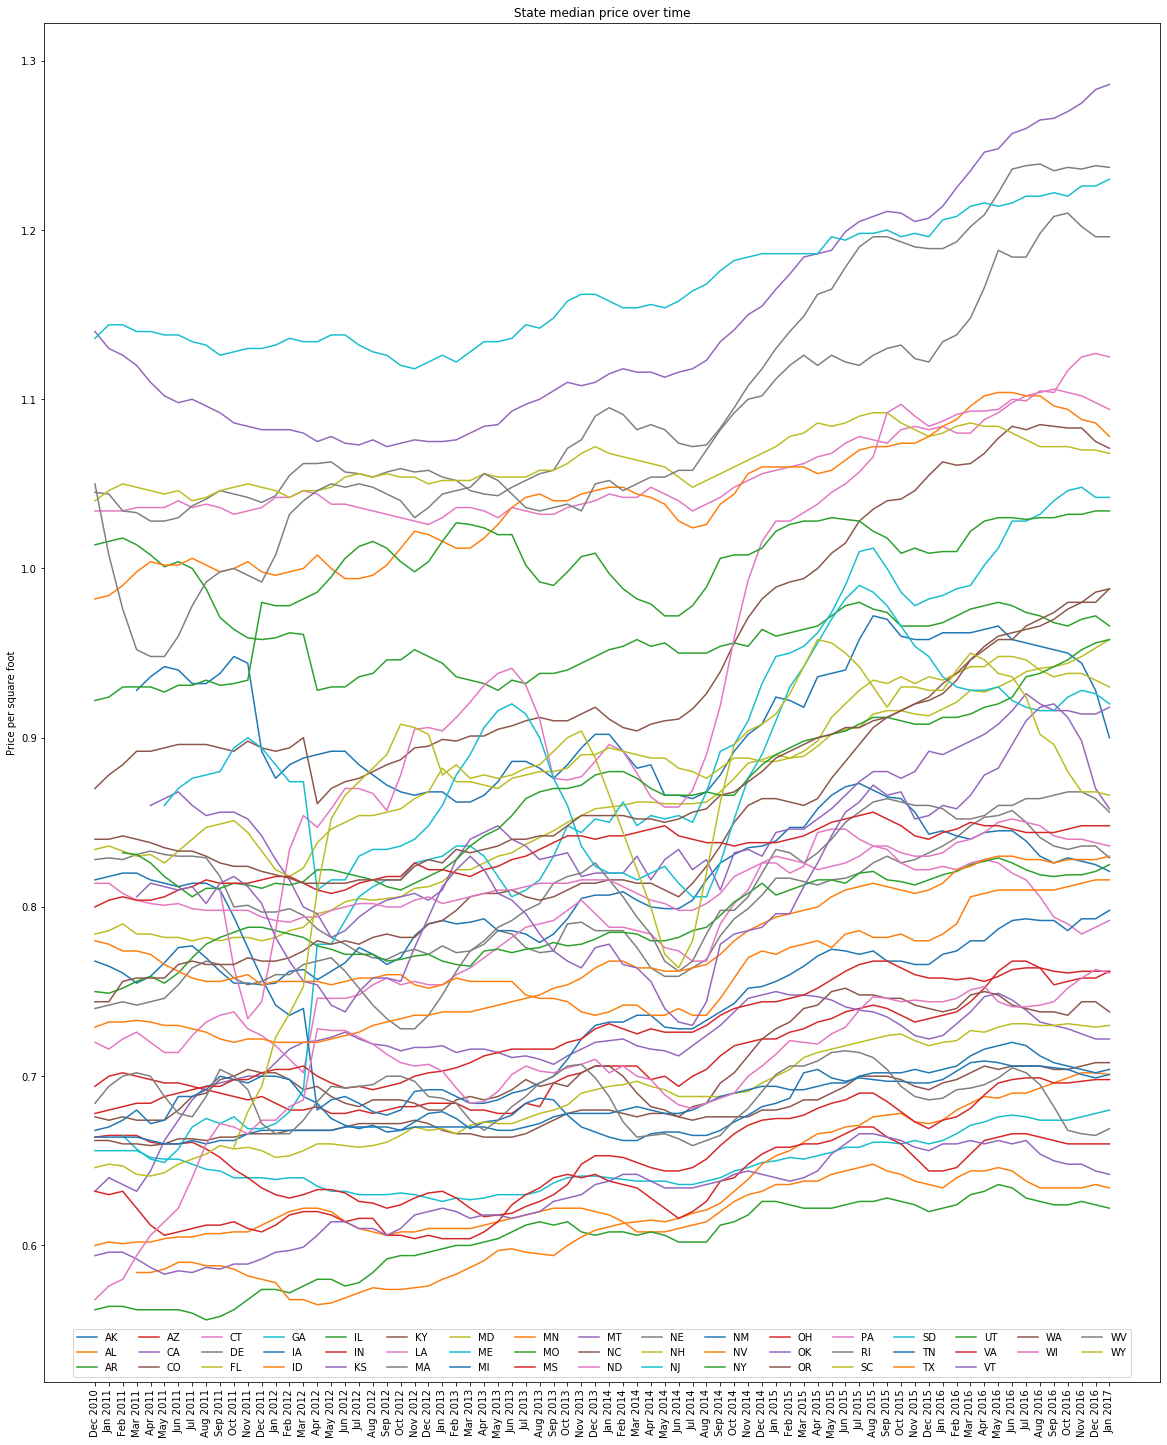

In [15]:
states2 = states.drop(['HI', 'DC'])

fig = plt.figure()
fig.set_figheight(25)
fig.set_figwidth(20)
plt.xticks(rotation=90)
plt.title("State median price over time")
plt.ylabel('Price per square foot')
for i in range(len(states2)):
    plt.plot(states2.iloc[i, 3:-2])
plt.legend(states2.index, loc = 'lower center', ncol=17)
    
plt.show()

There are a few cities which recieve a lot of complaints about rent prices. Below is a comparison of NYC, San Francisco, and Chicago prices compared to their home states.

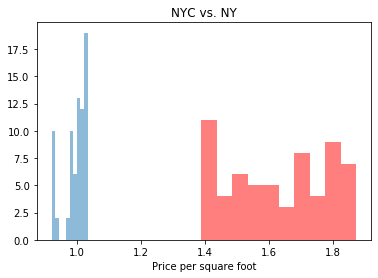

In [16]:
plt.hist(states2.loc['NY'][3:-2], alpha=.5)

plt.hist(zillow.loc['New York'][6:-2], alpha=.5, color='red')
plt.title('NYC vs. NY')
plt.xlabel('Price per square foot')
plt.show()

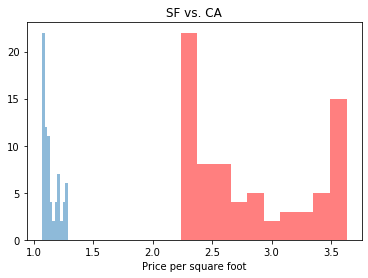

In [17]:
plt.hist(states2.loc['CA'][3:-2], alpha=.5)

plt.hist(zillow.loc['San Francisco'][6:-2], alpha=.5, color='red')
plt.title('SF vs. CA')
plt.xlabel('Price per square foot')
plt.show()

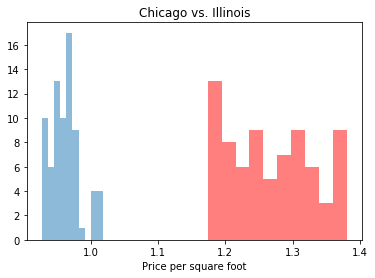

In [18]:
plt.hist(states2.loc['IL'][3:-2], alpha=.5)

plt.hist(zillow.loc['Chicago'][6:-2], alpha=.5, color='red')
plt.title('Chicago vs. Illinois')
plt.xlabel('Price per square foot')
plt.show()

It's fairly obvious each city is priced far higher than normal for its state. Below is a comparison of each against the other top five cities by population.

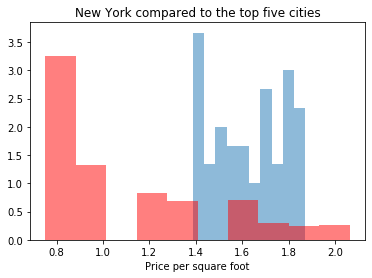

Ttest_indResult(statistic=-10.88416476364914, pvalue=1.4551766523138538e-24)
MannwhitneyuResult(statistic=3101.0, pvalue=1.0929956696759077e-20)


In [21]:
top_five = zillow.iloc[1:6, 6:-2].values.tolist()
top_five = [item for sublist in top_five for item in sublist]
new_york = zillow.loc['New York'][6:-2]

plt.hist(new_york, density=True, alpha=.5)
plt.hist(top_five, density=True, alpha=.5, color='red')
plt.xlabel('Price per square foot')
plt.title('New York compared to the top five cities')
plt.show()
print(scipy.stats.ttest_ind(top_five, new_york.dropna()))
print(scipy.stats.mannwhitneyu(top_five, new_york.dropna()))

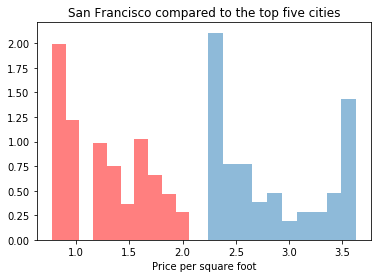

Ttest_indResult(statistic=-30.65645163540418, pvalue=9.28252736643022e-111)
MannwhitneyuResult(statistic=0.0, pvalue=1.2143644505342367e-42)


In [22]:
top_five = zillow.iloc[0:5, 6:-2].values.tolist()
top_five = [item for sublist in top_five for item in sublist if str(item) != 'nan']
sf = zillow.loc['San Francisco'][6:-2]

plt.hist(sf, density=True, alpha=.5)
plt.hist(top_five, density=True, alpha=.5, color='red')
plt.xlabel('Price per square foot')
plt.title('San Francisco compared to the top five cities')
plt.show()
print(scipy.stats.ttest_ind(top_five, sf.dropna()))
print(scipy.stats.mannwhitneyu(top_five, sf.dropna()))

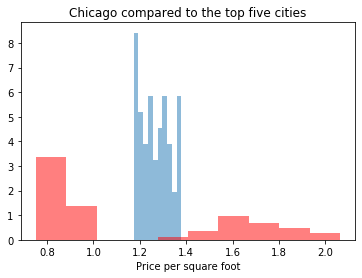

Ttest_indResult(statistic=-2.017869022646396, pvalue=0.0442183545257436)
MannwhitneyuResult(statistic=10275.0, pvalue=0.0004588616908260255)


In [23]:
top_five = zillow.iloc[0:2, 6:-2].values.tolist()
top_five2 = zillow.iloc[3:6, 6:-2].values.tolist()
top_five2= (item for sublist in top_five2 for item in sublist)
top_five.append(top_five2)
top_five = [item for sublist in top_five for item in sublist if str(item) != 'nan']
new_york = zillow.loc['Chicago'][6:-2]

plt.hist(new_york, density=True, alpha=.5)
plt.hist(top_five, density=True, alpha=.5, color='red')
plt.xlabel('Price per square foot')
plt.title('Chicago compared to the top five cities')
plt.show()
print(scipy.stats.ttest_ind(top_five, new_york.dropna()))
print(scipy.stats.mannwhitneyu(top_five, new_york.dropna()))

Turns out the only city of the three remotely close in price to the next top five cities is Chicago. That being said, Chicago's price per square foot is still very abnormal if we look at the Mann-Whitney p-value.

## Potential Improvements

I would love to use plotly and seaborn to generate interactive data-dense graphs (eg the ones plotting all 51 states) and simple regressions on the graphs involving every city.

The last tests of price abnormality in New York, San Francisco, and Chicago are admittedly lazy. It would be better to compare each city against all cities or cities with similar characteristics other than population.

Getting data on characteristics of cities and using said data to make a regression of prices based on the characteristics would be interesting. What factors cause price changes in cities?